In [37]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
from src.cleaner import *
pd.options.mode.chained_assignment = None
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("cyberpunk")

In [2]:
df=pd.read_csv('data/first_mens_scrape8660.csv')

In [3]:
df=cleaner(df)

In [4]:
df=rating_unpack(df)

In [5]:
df=create_columns_from_dic(df,'main accords')

In [6]:
df=notes_unpack(df)

In [7]:
df=df.drop(304)

In [8]:
df=df.drop(columns=['_id','image','description','top notes id','mid notes id','base notes id','user voted notes','user review date','similiar fragrences by user vote'])

In [9]:
#normalize data of user voted columns
sillage=df[['close to skin','radiates about arm length','radiates 6ft','fills room']]
sig=df[['have it','had it','want it']]
season=df[['winter','spring','summer','autumn']]
tod=df[['day','night']]
ratings=df[['female love u25','female love o25','male love u25','male love o25','female like u25','female like o25','male like u25','male like o25','female dislike u25','female dislike o25','male dislike u25','male dislike o25']]
normalized_sillage = preprocessing.normalize(sillage)
normalized_sig = preprocessing.normalize(sig)
normalized_season = preprocessing.normalize(season)
normalized_tod = preprocessing.normalize(tod)
normalized_ratings = preprocessing.normalize(ratings)

In [10]:
sillage=pd.DataFrame()

In [11]:
sillage['name']=df['name']

In [13]:
#create sillage df with normalized votes
sillage['stay on skin']=normalized_sillage[:,0]
sillage['arm length']=normalized_sillage[:,1]
sillage['radiate 6ft']=normalized_sillage[:,2]
sillage['full room']=normalized_sillage[:,3]

In [15]:
#add ratings with normalized votes to df
sillage['female love u25']=normalized_ratings[:,0]
sillage['female love o25']=normalized_ratings[:,1]
sillage['male love u25']=normalized_ratings[:,2]
sillage['male love o25']=normalized_ratings[:,3]
sillage['female like u25']=normalized_ratings[:,4]
sillage['female like o25']=normalized_ratings[:,5]
sillage['male like u25']=normalized_ratings[:,6]
sillage['male like o25']=normalized_ratings[:,7]
sillage['female dislike u25']=normalized_ratings[:,8]
sillage['female dislike o25']=normalized_ratings[:,9]
sillage['male dislike u25']=normalized_ratings[:,10]
sillage['male dislike o25']=normalized_ratings[:,11]

In [17]:
sillage['avg rating']=df['avg rating']

In [18]:
sillage

,name,stay on skin,arm length,radiate 6ft,full room,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25,avg rating
0,Pour Un Homme de Caron Caron for men,0.252924,0.879735,0.337232,0.219934,0.030309,0.171752,0.111134,0.697112,0.030309,0.111134,0.080825,0.585978,0.010103,0.030309,0.050515,0.323298,3.91
1,Reveal Men Calvin Klein for men,0.198593,0.706108,0.538407,0.414838,0.010936,0.076554,0.196854,0.546816,0.043745,0.076554,0.262471,0.699924,0.010936,0.032809,0.087490,0.284344,3.84
2,Hugo Just Different Hugo Boss for men,0.164693,0.945659,0.249696,0.127505,0.038528,0.025685,0.154112,0.346753,0.051371,0.077056,0.346753,0.809090,0.012843,0.012843,0.064213,0.256854,3.80
3,Sunshine Men Amouage for men,0.206796,0.594540,0.687598,0.361894,0.010134,0.111476,0.121610,0.760061,0.010134,0.081073,0.091207,0.415500,0.010134,0.050671,0.121610,0.435769,3.63
4,L'Homme Sport Lanvin for men,0.291883,0.854293,0.391551,0.177978,0.011699,0.046797,0.152091,0.444574,0.011699,0.046797,0.280783,0.795553,0.011699,0.011699,0.046797,0.245685,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,Burberry London for Men Special Edition 2009 B...,0.477240,0.596550,0.536895,0.357930,0.013053,0.078319,0.404650,0.757087,0.013053,0.039160,0.130532,0.482969,0.039160,0.013053,0.039160,0.039160,4.43
7478,CH Men Africa Carolina Herrera for men,0.240098,0.891793,0.342997,0.171499,0.030409,0.030409,0.324359,0.577765,0.030409,0.010136,0.283815,0.506812,0.010136,0.010136,0.253406,0.395313,3.62
7479,Vetiver L.T. Piver for men,0.092848,0.835629,0.464238,0.278543,0.009230,0.027690,0.009230,0.646102,0.027690,0.129220,0.009230,0.747632,0.009230,0.027690,0.009230,0.064610,4.22
7480,212 Men Ice Carolina Herrera for men,0.119952,0.179928,0.959616,0.179928,0.037820,0.075641,0.302564,0.819443,0.012607,0.037820,0.126068,0.428632,0.012607,0.037820,0.012607,0.163889,4.36


In [39]:
avg_rating_4_5.describe()

,stay on skin,arm length,radiate 6ft,full room,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25,avg rating
count,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,0.241133,0.608126,0.419613,0.334605,0.030434,0.130426,0.121650,0.698771,0.025788,0.089167,0.101301,0.481594,0.014707,0.027045,0.030838,0.125381,4.290515
std,0.215506,0.284914,0.267747,0.242608,0.059060,0.175720,0.122689,0.222986,0.054449,0.137190,0.122776,0.247974,0.023695,0.043668,0.045408,0.092798,0.251781
min,0.000000,0.000000,0.000000,0.000000,0.002425,0.002425,0.002425,0.005773,0.002425,0.002425,0.002425,0.004082,0.002425,0.002425,0.002425,0.002425,4.000000
25%,0.071069,0.436685,0.235702,0.169231,0.009820,0.013539,0.012313,0.577995,0.009801,0.010947,0.011778,0.329802,0.009714,0.009995,0.010000,0.038532,4.100000
50%,0.212631,0.688395,0.408248,0.310422,0.011235,0.068859,0.094229,0.743485,0.011156,0.035070,0.065061,0.508238,0.010818,0.011541,0.012752,0.123316,4.240000
75%,0.341512,0.832050,0.625543,0.472866,0.020058,0.158638,0.183073,0.861265,0.014482,0.102316,0.141058,0.674064,0.012398,0.021378,0.034754,0.180824,4.410000
max,1.000000,1.000000,1.000000,1.000000,0.706401,0.999450,0.801140,0.999450,0.706930,0.985473,0.894070,0.977147,0.499800,0.577004,0.577004,0.602716,5.000000


In [30]:
#find avg rating intervals for cologne given a small voting threshold to reduce outliers
avg_rating_4_5=sillage[(sillage['avg rating']>=4)&((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]
avg_rating_3_4=sillage[((sillage['avg rating']>=3) & (sillage['avg rating']<4))&((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]
avg_rating_2_3=sillage[((sillage['avg rating']>=2) & (sillage['avg rating']<3))&((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]
avg_rating_1_2=sillage[((sillage['avg rating']>=1) & (sillage['avg rating']<2))&((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]
avg_rating_0_1=sillage[((sillage['avg rating']>=0) & (sillage['avg rating']<1))&((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]

Text(0.5, 0, 'Aggressiveness')

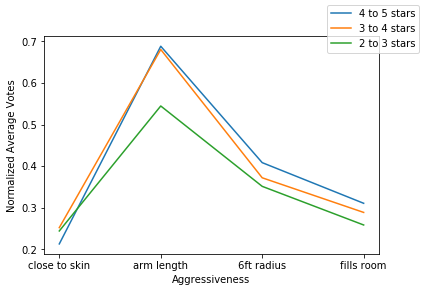

In [70]:
#create line graph for sillage levels for all frag's
sillage_type=['close to skin','arm length','6ft radius','fills room']
rating_4_5=[np.median(avg_rating_4_5['stay on skin']),np.median(avg_rating_4_5['arm length']),np.median(avg_rating_4_5['radiate 6ft']),np.median(avg_rating_4_5['full room'])]
rating_3_4=[np.median(avg_rating_3_4['stay on skin']),np.median(avg_rating_3_4['arm length']),np.median(avg_rating_3_4['radiate 6ft']),np.median(avg_rating_3_4['full room'])]
rating_2_3=[np.median(avg_rating_2_3['stay on skin']),np.median(avg_rating_2_3['arm length']),np.median(avg_rating_2_3['radiate 6ft']),np.median(avg_rating_2_3['full room'])]

plt.plot(sillage_type,rating_4_5)
plt.plot(sillage_type,rating_3_4)
plt.plot(sillage_type,rating_2_3)
plt.figlegend(['4 to 5 stars','3 to 4 stars','2 to 3 stars'],loc=1)
plt.ylabel('Normalized Average Votes')
plt.xlabel('Aggressiveness')


In [60]:
test=sillage[((sillage['male love o25']>=.411569) | (sillage['female love o25']>=.051584 ))]

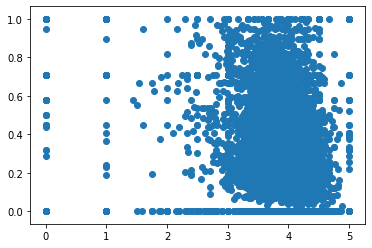

In [69]:
rates=sillage['avg rating']
skin_score=sillage['stay on skin']
arm_score=sillage['arm length']
sixfeet_score=sillage['radiate 6ft']
room_score=sillage['full room']

plt.scatter(rates,skin_score)
# plt.scatter(arm_score,rates)
# plt.scatter(sixfeet_score,rates)
# plt.scatter(room_score,rates)